## Разминка

Создайте список (list) и массив (ndarray), содержащие числа от 0 до 100 000 000. Напишите функцию, которая вычисляет сумму всех элементов массива, используя цикл for. Замерьте: время выполнения этой функции на списке и на массиве, время выполнения функции sum() на списке и на массиве, время выполнения функции numpy.sum() на списке и на массиве.

In [1]:
import numpy as np

In [2]:
ARRAY_SIZE = 10000000

In [3]:
array = np.arange(ARRAY_SIZE)
python_list = list(range(ARRAY_SIZE))

In [4]:
def my_sum(x):
    s = 0;
    for i in x:
        s+=i
    return s

In [5]:
%time my_sum(array)

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: RuntimeWarning: overflow encountered in long_scalars


Wall time: 1.75 s


-2014260032

In [6]:
%time my_sum(python_list)

Wall time: 678 ms


49999995000000

In [7]:
%time sum(python_list)

Wall time: 419 ms


49999995000000

In [8]:
%time sum(array)

Wall time: 1.06 s


C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: overflow encountered in long_scalars
  if __name__ == '__main__':


-2014260032

In [9]:
%time np.sum(array)

Wall time: 68 ms


-2014260032

In [10]:
%time np.sum(python_list)

Wall time: 871 ms


-2014260032

sum() показывает хорошую скорость на питоновском массиве, но не на numpy массиве. np.sum же наоборот быстрее работает на numpy массиве. my_sum() в целом работает медленее, чем стандартные функции. Numpy массив по сути представляет собой обычный Сишный массив, то есть цельный блок памяти объектов одного типа, что позволяет numpy производить быстрые вычисления. Python list же представляет собой мощный инструмент для работы с массивами разных типов объектов, что несет за собой такие плюсы как: эффективная вставка, удаление, добавление и конкатенация, а так же крутой механизм list comprehensions. Но это устанавливает такие ограничения как: нет поддержки векторизованных вычислений(сложения и умножения). А возможность хранить в себе объекты разных типов ведет к тому, что надо хранить информацию о каждом элементе, следовательно для операций над элементами сначала надо узнать тип, что конечно же увеличивает время работы.

Загрузите и выведите на экран картинку squirrel.png. Используйте библиотеки skimage и matplotlib. Получите и интерпретируйте размеры картинки. Выведите верхнюю и левую половины изображения. Выведите произвольный прямоугольник изображения. Выведите каждый канал изображения отдельно.

In [11]:
import matplotlib
from matplotlib import pyplot as plt
from skimage import io
%matplotlib inline

(400, 604)


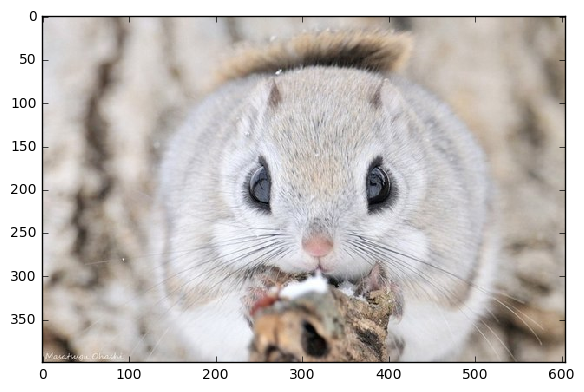

In [13]:
squirell = io.imread("data/squirrel.png")
io.imshow(squirell)
print(squirell.shape[:2])

In [13]:
print(squirell.shape)

(400, 604, 4)


3х-мерный массив, где 400 - высота картинки, 604 - ширина, 4 - 4 канала(r,g,b и alpha). То есть каждый элемент массива представляет собой значение пикселя соотвествующего канала(r, g, b или alpha) на соотвествующей координате.

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


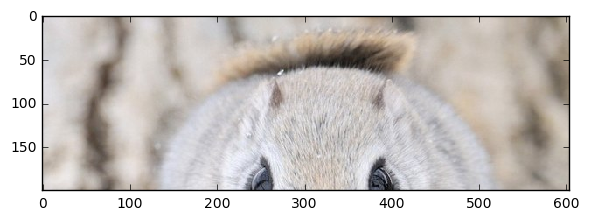

In [14]:
def get_upper_half(image):
    return image[:(image.shape[0]/2)]

upper_squirell = get_upper_half(squirell)
io.imshow(upper_squirell)

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


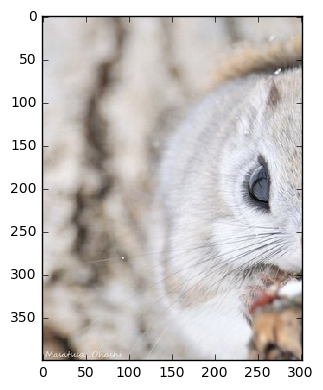

In [15]:
def get_left_half(image):
    return image[:,:(image.shape[1]/2)]

left_squirell = get_left_half(squirell)
io.imshow(left_squirell)

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


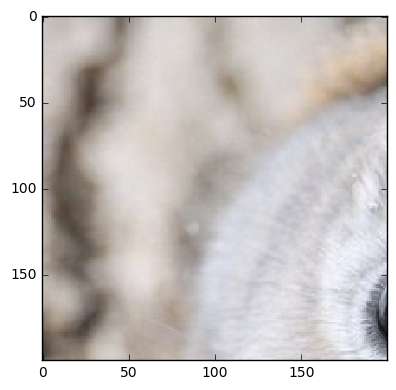

In [16]:
def get_part_squirell(square_size, image):
    random_height = np.random.randint(0, image.shape[0] - square_size, 1)
    random_width = np.random.randint(0, image.shape[1] - square_size, 1)
    return image[random_height:random_height + square_size, random_width:random_width + square_size]

part_squirell = get_part_squirell(200, squirell)
io.imshow(part_squirell)

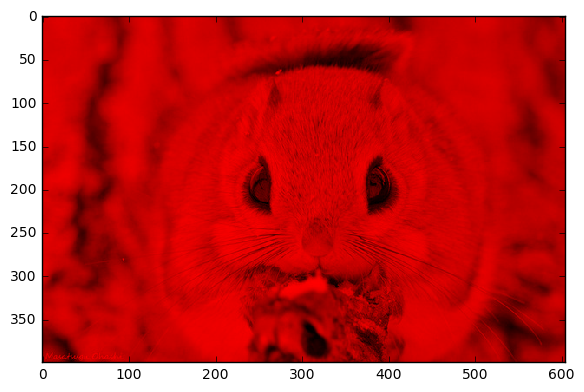

In [17]:
def get_red(image):
    image[:,:,1:3] = 0
    return image

red = get_red(squirell)
io.imshow(red)

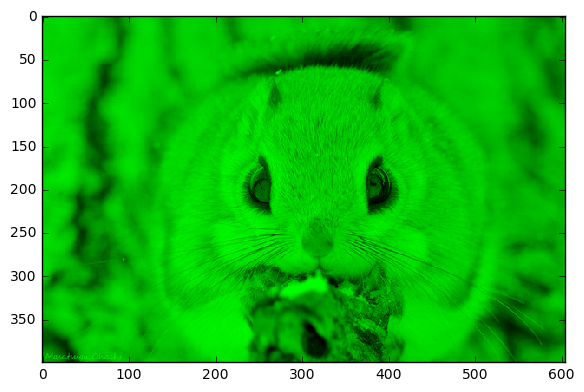

In [18]:
def get_green(image):
    image[:,:,0:4:2] = 0
    return image

squirell = io.imread("data/squirrel.png")
green = get_green(squirell)
io.imshow(green)

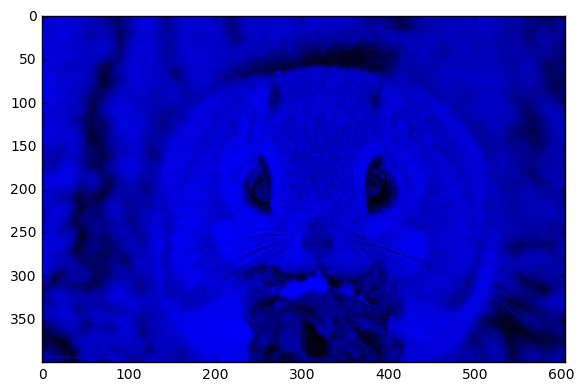

In [19]:
def get_blue(image):
    image[:,:,0:2] = 0
    return image

squirell = io.imread("data/squirrel.png")
blue = get_blue(squirell)
io.imshow(blue)

Получите черно-белое изображение путем усреднения по каналам. Сначала самостоятельно реализуйте усреднение, затем правильно воспользуйтесь функцией numpy.mean() Получите негатив для черно-белого изображения. Бинаризуйте черно-белое изображение по некоторому порогу. Уменьшите цветное изображение в 2 раза. Используйте самый элементарный способ. Отразите цветное изображение по любой из осей. Поверните на 90 градусов и отразите цветное изображение за константное время. Преобразуйте картинку в матрицу, где строка - это пиксель изображения, а столбцы - это кординаты и значение RGB этого пикселя.

In [20]:
def my_mean(image):
    return (np.sum(image, -1)/image.shape[2])

C:\Program Files\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:77: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


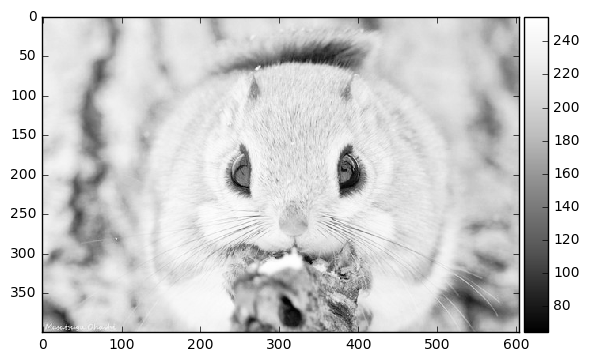

In [21]:
def get_greyscale(image):
    return my_mean(image)
    
squirell = io.imread("data/squirrel.png")
grey = get_greyscale(squirell)
io.imshow(grey, cmap = matplotlib.cm.Greys_r)

C:\Program Files\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:77: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


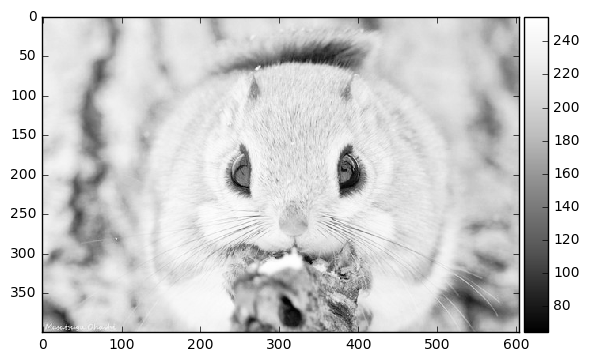

In [22]:
def get_greyscale_np(image):
    return np.mean(image, -1)

squirell = io.imread("data/squirrel.png")
grey = get_greyscale_np(squirell)
io.imshow(grey, cmap = matplotlib.cm.Greys_r)

C:\Program Files\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:77: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


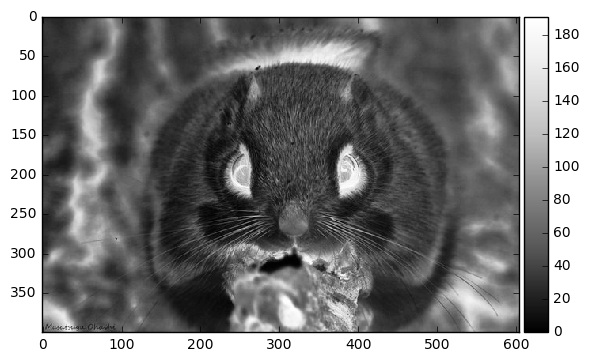

In [23]:
MAX = 255

def get_grey_negative(image):
    return MAX - image

squirell = io.imread("data/squirrel.png")
grey_negative = get_grey_negative(grey)
io.imshow(grey_negative, cmap = matplotlib.cm.Greys_r)

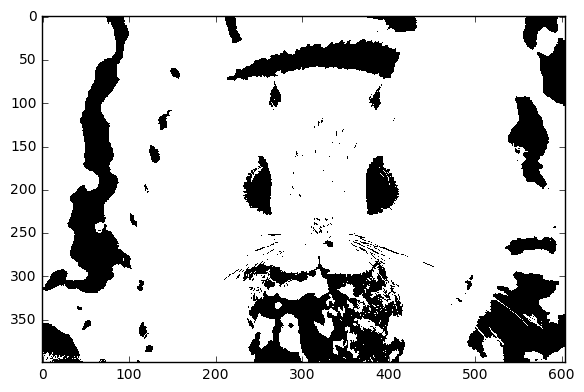

In [24]:
TRESHOLD = 180

def get_binary(image):
    return image > TRESHOLD

squirell = io.imread("data/squirrel.png")
binary = get_binary(grey)
io.imshow(binary,  cmap = matplotlib.cm.Greys_r)

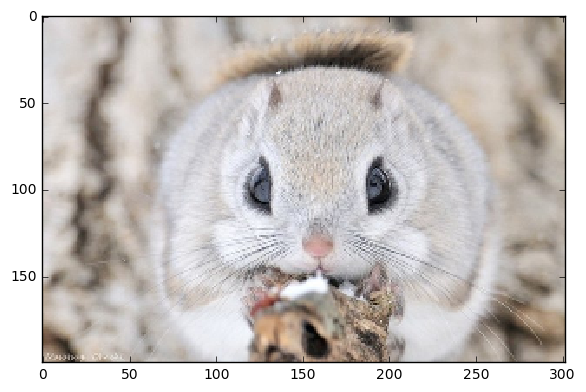

In [25]:
def get_rescaled(image):
    return image[0:image.shape[0]:2, 0:image.shape[1]:2]

squirell = io.imread("data/squirrel.png")
rescaled = get_rescaled(squirell)
io.imshow(rescaled)

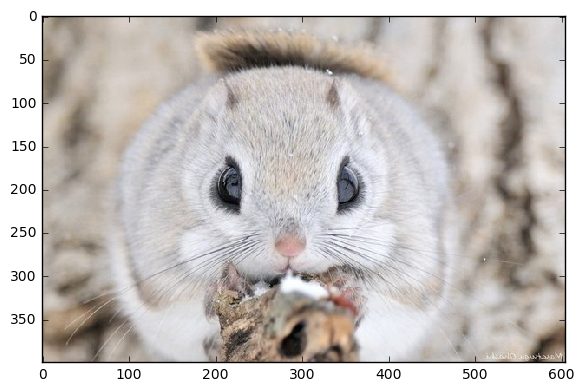

In [26]:
def get_mirror(image):
    return image[:,::-1]

mirror = get_mirror(squirell)
io.imshow(mirror)

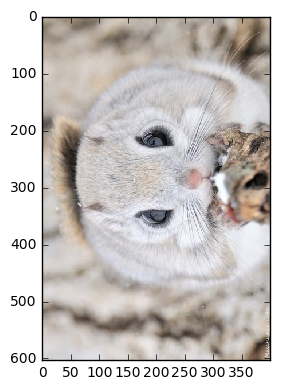

In [27]:
def get_rotated(image):
    return np.transpose(image[:,::-1], (1,0,2))

rotated = get_rotated(squirell)
io.imshow(rotated)

**Дополнительный вопрос. Нужно объяснить, почему метод np.transpose работает за константное время?**

np.tranpose ничего не делает с самим массивом, функция возвращает представление массива с другими шагами массива(stride) 
и другой формы.

Преобразуйте картинку в матрицу, где строка - это пиксель изображения, а столбцы - это кординаты и значение RGB этого пикселя.

In [28]:
def convert_to_matrix(image):
    indices = np.dstack(np.indices(image.shape[:2]))
    data = np.concatenate((image, indices), axis=-1)
    return data

convert = convert_to_matrix(squirell)
print(convert)

[[[218 212 216 255   0   0]
  [217 211 215 255   0   1]
  [218 212 216 255   0   2]
  ..., 
  [194 184 174 255   0 601]
  [198 188 178 255   0 602]
  [200 190 180 255   0 603]]

 [[218 212 216 255   1   0]
  [218 212 216 255   1   1]
  [218 212 216 255   1   2]
  ..., 
  [194 184 174 255   1 601]
  [197 187 177 255   1 602]
  [200 190 180 255   1 603]]

 [[219 213 217 255   2   0]
  [219 213 217 255   2   1]
  [218 213 217 255   2   2]
  ..., 
  [193 183 173 255   2 601]
  [196 186 176 255   2 602]
  [199 189 179 255   2 603]]

 ..., 
 [[184 168 153 255 397   0]
  [181 165 150 255 397   1]
  [182 166 151 255 397   2]
  ..., 
  [193 181 167 255 397 601]
  [194 182 168 255 397 602]
  [196 184 170 255 397 603]]

 [[186 170 154 255 398   0]
  [180 164 148 255 398   1]
  [179 163 147 255 398   2]
  ..., 
  [193 181 167 255 398 601]
  [195 183 169 255 398 602]
  [196 184 170 255 398 603]]

 [[181 165 149 255 399   0]
  [179 163 147 255 399   1]
  [185 169 153 255 399   2]
  ..., 
  [194 182 

## Задание 1

 В машинном обучении большую роль играет вектор-функция **Softmax**, заданная формулой: $S(x)^i=\frac{e^{x^i}}{\sum_{j=1}^{n}e^{x^j}}$, где $n$ - размерность вектора $x$, $i=1...n$. *Здесь и далее верхний индекс означает элемент вектора.* Данная функция позволяет придать эелементам вектора свойства вероятности: $0 \leq S(x)^i \leq 1, \sum_{i=1}^{n}S(x)^i = 1$. Реализуйте данную функцию средствами numpy. 
  1. Функция принимает на вход вектор (произвольной длины) и возвращает вектор.
  2. Функция принимает на вход матрицу (произвольных размеров), где строки - это вектора, для которых необходимо посчитать softmax, возвращает матрицу исходных размеров.
<br />
<br />

In [29]:
import numpy as np

def softmax(x):
    e = np.exp(x.T)
    return (e / e.sum(axis=0)).T

In [30]:
test_array = np.arange(0,3)
test_arrays = np.vstack((test_array, test_array, test_array))

In [31]:
softmax(test_array)

array([ 0.09003057,  0.24472847,  0.66524096])

In [32]:
softmax(test_arrays)

array([[ 0.09003057,  0.24472847,  0.66524096],
       [ 0.09003057,  0.24472847,  0.66524096],
       [ 0.09003057,  0.24472847,  0.66524096]])

## Задание 2

 Метод наименьших квадратов широко используется для аппроксимации точечно заданных функций. Для модели многомерной линейной регрессии (где неизвестная заданная точечно функция аппроксимируется линейной моделью) метод наименьших квадратов записывается как $Q(X^l, \theta, \theta_0) = \sum_{i=1}^{l}\left(f(x_i, \theta, \theta_0) - y_i)\right)^2 \to min$, где $Q(X^l, \theta, \theta_0)$ - функционал потерь, $x_i$ - элемент обучающего множества примеров, $y_i$ - ответ на примере $x_i$, $X^l=\{(x_1, y_1),...,(x_l, y_l)\}$ - обучающая выборка, $f(x, \theta, \theta_0)=\sum_{j=1}^{n}\theta^j x^j + \theta_0$ - линейная функция, $n$ - размерность вектора $x$. 
  1. Перепишите данную запись в матричную форму.
  2. Сгенерируйте случайную обучающую выборку ($n$ и $l$ выберите на свое усмотрение, но $n$ не менее 3). Здесь предполагается, что истинная зависимость между $x$ и $y$ линейная, но следует добавить к ответам шум (например, из стандартного распределения). 
  3. Найдите оптимальные значения $\theta$ и $\theta_0$, используя матричные вычисления.
<br />
<br />

**A: Матричная форма:** $\theta = [{X^T X}]^{-1} X^T  Y $

**B:**

In [33]:
import numpy as np

COEF_NUMBER = 10
LINE_NUMBER = 1000
MAX_RAND = 100
MIN_RAND = 0

In [34]:
def generate_coef(number_of_coef):
    return np.random.randint(MIN_RAND,MAX_RAND,size=number_of_coef)

In [35]:
def generate_feature(n, l):
    matrix_x = np.random.randint(MIN_RAND, MAX_RAND, size=(l,n))
    matrix_x = add_ones_rows(matrix_x)
    return matrix_x

In [36]:
def add_noise(y):
    noise = np.random.standard_normal(size=(y.shape[0], 1))
    y += noise
    return y

In [37]:
def add_ones_rows(X):
    dim0 = X.shape[0]
    dim1 = X.shape[1]
    X1 = np.ones((dim0, dim1 + 1))
    X1[:, 1:] = X
    return X1

In [38]:
def linear_func(array):
    y = np.sum(array[1:] * B[1:]) + B[0]
    return y;

In [39]:
def generate_y(feature):
    y = np.apply_along_axis(linear_func, axis=1, arr=feature)
    return y.reshape(feature.shape[0], 1)

In [40]:
B = generate_coef(COEF_NUMBER)
X = generate_feature(COEF_NUMBER - 1, LINE_NUMBER)
y = generate_y(X)
y = add_noise(y)

**C:**

In [41]:
def linear_regression(X, y):
    Xt = np.matrix.transpose(X)
    XtX = np.dot(Xt,X)
    XtXinv = np.linalg.inv(XtX)
    XtXinvXt = np.dot(XtXinv, Xt)
    theta = np.dot(XtXinvXt,y)
    return theta

In [42]:
theta = linear_regression(X,y)

In [43]:
print("B: \n", B)
print("THETA: \n",theta)

B: 
 [42 29 36  5 56 43 29 20 78 70]
THETA: 
 [[ 41.82283623]
 [ 28.99890102]
 [ 35.9984586 ]
 [  5.0010123 ]
 [ 55.99998529]
 [ 43.00146595]
 [ 29.00333667]
 [ 19.99962043]
 [ 78.00044359]
 [ 69.9994869 ]]


## Задание 3

Байесовское решающее правило дано формулой: $a(x)=argmax_{c \in C}P(с)P(x|c)$, где $x$ - некоторый вектор (объект), $C$ множество допустимых ответов (классов) на $x$, $P(c)$ - априорная вероятность класса $c$, $P(x|c)$ - условная вероятность объекта $x$ принадлежать классу $c$, $P(x)$ - вероятность встретить объект $x$.
  1. Сгенерируйте случайную обучающую выборку согласно следующим требованиям:
    - Длина вектора $x$ на ваше усмотрение, но не менее 3.
    - Каждый элемент вектора (признак) $x$ может принимать значение из конечного множества допустимых значений. Для разных элементов вектора это могут быть разные множества. Более формально: $x^j \in D_j, |D_j| < \infty$. Такие признаки называются категориальными. Множества $D_j$ задайте самостоятельно.
    - $|C|$ - случайное число не меньше 2.
    - Количество элементов каждого класса случайно, но не менее 50.
    - Сгенерируйте объекты каждого из классов (по количеству из предыдущего пункта) так, чтобы $\forall x \in X, c \in C, \tilde{c} \in C, c \neq \tilde{c}, j=1...n: P(x^j \in D_{j,c}|x \in X_c) > P(x^j \in D_{j,\tilde{c}}|x \in X_c)$, где $D_{j,c}$ - множество допустимых значений признака $x_j$ для класса $c$, $\bigcup_{c \in C}D_{j, c} = D_j$, $X$ - множество всех объектов $x$, $X_c$ - множество объектов $x$, принадлежащих классу $c$. Множества $D_{j,c}$ также задайте самостоятельно. Обратите внимание, что они, могут пересекаться.
  2. Сгенерируйте тестовую выборку, опираясь на эти же требования. *Помните, что для тестовой выборки все $P(x^j \in D_{j,c}|x \in X_c)$ должны остаться неизменными*.
  3. Для объектов из тестовой выборки реализуйте Байесовское решающее правило, исходя из предположения независимости признаков объекта. Все необходимые значения вероятностей оцените из обучающей выборки. 
  4. Сравните предсказанные и реальные ответы на тестовых объектах, используя метрику accuracy. 

**1:**

In [14]:
import numpy as np
import random

FEATURES_NUMBER = 6
MIN_FEATURE = 5
MAX_FEATURE = 10
MIN_CLASS = 2
MAX_CLASS = 5
MIN_CLASS_SIZE = 50
MAX_CLASS_SIZE = 200

def softmax(x):
    e = np.exp(x)
    return e / e.sum(axis=0)

def generate_feature_dist(feat_size):
    feature_value_dst = [np.linspace(0, 1, num=n) for n in feat_size]
    fd = [softmax(i) for i in feature_value_dst]
    return fd

def generate_feature_domains(n_features, min_feature_size, max_feature_size):
    feature_sizes = [random.randint(min_feature_size, max_feature_size) for i in range(n_features)]
    feature_domains = [np.arange(n) for n in feature_sizes]
    fvd = generate_feature_dist(feature_sizes)
    return feature_domains, fvd

def generate_class_and_class_sizes():
    n = np.random.randint(MIN_CLASS, MAX_CLASS)
    return n, np.random.randint(MIN_CLASS_SIZE, MAX_CLASS_SIZE, n)

def generate_dist_by_class(feature_value_dst, n_classes):
    matr = []
    for i in range(n_classes):
        line = []
        for fvd in feature_value_dst:
            line.append(np.random.permutation(fvd))
        matr.append(line)
    return matr

def generate_class_objects(class_size, n_features, feature_domains, feature_value_dst):
    class_objects = np.zeros((class_size, n_features))

    for j in range(n_features):
        ft = feature_domains[j]
        fvt = feature_value_dst[j]
        class_objects[:, j] = np.random.choice(ft, p=fvt, size=class_size)
    return class_objects

def generate_dataset(class_sizes, n_features, feature_domains, feature_value_dst):
    X = []
    y = []
    for c, class_size in enumerate(class_sizes):
        class_objects = generate_class_objects(class_size,
                                               n_features,
                                               feature_domains,
                                               feature_value_dst[c])

        X += [class_objects]
        y += [c] * class_size

    X = np.concatenate(X)
    y = np.array(y)

    return X, y

In [23]:
n_classes, class_sizes = generate_class_and_class_sizes()
feature_domains, feature_value_dst = generate_feature_domains(FEATURES_NUMBER, MIN_FEATURE, MAX_FEATURE)
dist_by_class = generate_dist_by_class(feature_value_dst, n_classes)
X, y = generate_dataset(class_sizes, FEATURES_NUMBER, feature_domains, dist_by_class)

**2:**

In [24]:
X1, y1 = generate_dataset(class_sizes, FEATURES_NUMBER, feature_domains, dist_by_class)

**3:**

In [31]:
def get_prob_classes():
    pclasses = []
    for i in range(n_classes):
        pclasses.append(class_sizes[i]/class_sizes.sum())
    return pclasses

pclasses = get_prob_classes()

def get_feature_prob(train_x, test_x,  classn):
    res = []
    for i in range(FEATURES_NUMBER):
        if classn == 0:
            res.append((np.count_nonzero(train_x[:class_sizes[classn],i] == test_x[i])/train_x.shape[0]))
        else:
            res.append((np.count_nonzero(train_x[class_sizes[classn-1]:class_sizes[classn], i] == test_x[i])/train_x.shape[0]))
    return res


def classify(train_x, train_y, test_x, test_y):
    px = np.zeros([n_classes, FEATURES_NUMBER])
    arg = np.zeros([n_classes])
    for i in range(n_classes):
        px[i, :] = get_feature_prob(train_x, test_x, i)
        arg[i] = np.prod(px[i, :]) * pclasses[i]
    return arg.argmax()

**4:**

In [32]:
def accuracy(train_x, train_y, test_x, test_y):
    classifyed = np.zeros(y.shape[0])
    for i in range(y.shape[0]):
        classifyed[i] = classify(train_x, train_y, test_x[i], test_y)
    z = classifyed == test_y
    return np.count_nonzero(z == True) / test_y.shape[0]

acc = accuracy(X,y,X1,y1)
print("accuracy = : ", acc)

accuracy = :  0.45741324921135645


## Задание 4

Современную область компьютерного зрения невозможно представить без сверточных нейронных сетей. Как следует из названия, эти сети используют операцию свертки. Важным фактором для таких нейронных сетей является время вычисления свертки. **Здесь запрещено использовать готовые функции numpy и scipy**.
  1. Реализуйте свертку изображения squirrel.png с фильтром файла conv_filter.npy и визуализируйте результат.
  2. Реализуйте свертку с использованием быстрого преобразования Фурье и визуализируйте результат.
  3. Сравните время работы первого и второго методов.
<br />
<br />

**1:**

In [57]:
import skimage
from skimage import data, io, filters, util
import numpy as np
from matplotlib import pyplot as plt

In [58]:
def load_image_and_filter():
    filt = np.load("data/conv_filter.npy")
    squirell = io.imread("data/squirrel.png")
    return filt, squirell

In [59]:
def apply_filter(filt, squir):
    rows = squir.shape[0]
    cols = squir.shape[1]
    kernel_rows = filt.shape[0]
    kernel_cols = filt.shape[1]
    kernel_center = 5

    out = np.copy(squir)

    for r in range(rows):
        for c in range(cols):
            for kr in range(kernel_rows):
                mm = kernel_rows - 1 - kr
                for kc in range(kernel_cols):
                    nn = kernel_cols - 1 - kc

                    ii = r + (kr - kernel_center)
                    jj = c + (kc - kernel_center)

                    if (ii >= 0 and ii < rows and jj >= 0 and jj < cols):
                        out[r][c][0] += squir[ii][jj][0] * filt[mm][nn][0]
                        out[r][c][1] += squir[ii][jj][1] * filt[mm][nn][1]
                        out[r][c][2] += squir[ii][jj][2] * filt[mm][nn][2]

    return out

In [ ]:
filt, squirell = load_image_and_filter()

In [ ]:
filtred = apply_filter(filt, squirell)

io.imshow(filtred)
plt.show()

**2:**

In [ ]:
from math import log
from skimage import io
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

def load_image_and_filter():
    filt = np.load("data/conv_filter.npy")
    squirell = io.imread("data/squirrel.png")
    return filt, squirell

In [ ]:
def fft(x):

    x = np.asarray(x, dtype=float)
    N = x.shape[0]

    N_min = min(N, 32)

    n = np.arange(N_min)
    k = n[:, None]
    M = np.exp(-2j * np.pi * n * k / N_min)
    X = np.dot(M, x.reshape((N_min, -1)))

    while X.shape[0] < N:
        X_even = X[:, :X.shape[1] / 2]
        X_odd = X[:, X.shape[1] / 2:]
        factor = np.exp(-1j * np.pi * np.arange(X.shape[0]) / X.shape[0])[:, None]
        X = np.vstack([X_even + factor * X_odd,
                       X_even - factor * X_odd])

    return X.ravel()

In [ ]:
def ifft(x):
    x = np.asarray(x, dtype=float)
    N = x.shape[0]

    N_min = min(N, 32)

    n = np.arange(N_min)
    k = n[:, None]
    M = np.exp(2j * np.pi * n * k / N_min)
    X = np.dot(M, x.reshape((N_min, -1)))

    while X.shape[0] < N:
        X_even = X[:, :X.shape[1] / 2]
        X_odd = X[:, X.shape[1] / 2:]
        factor = np.exp(1j * np.pi * np.arange(X.shape[0])
                        / X.shape[0])[:, None]
        X = np.vstack([X_even + factor * X_odd,
                       X_even - factor * X_odd])

    return X.ravel()/N

In [ ]:
def FFt2d(x):
    row_matr = np.apply_along_axis(fft, axis=0, arr=x)
    fur_matr = np.apply_along_axis(fft, axis=1, arr=row_matr)
    return fur_matr

In [ ]:
def iFFt2d(x):
    row_matr = np.apply_along_axis(ifft, axis=0, arr=x)
    fur_matr = np.apply_along_axis(ifft, axis=1, arr=row_matr)
    return fur_matr

In [ ]:
def convolve(image, filter):

    FFt = FFt2d
    iFFt = iFFt2d

    r1, c1 = image.shape
    r2, c2 = filter.shape

    r = 2 * max(r1, r2)
    c = 2 * max(c1, c2)

    pr2 = int(log(r) / log(2.0) + 1.0)
    pc2 = int(log(c) / log(2.0) + 1.0)
    r = 2 ** pr2
    c = 2 ** pc2

    image = np.lib.pad(image, ((0, r - r1),(0,c - c1)), 'constant', constant_values=0)
    filter = np.lib.pad(filter, ((0, r - r2), (0, c - c2)), 'constant', constant_values=0)
    fftimage = FFt(image) * FFt(filter)

    return iFFt(fftimage)[:r1,:c1].real

In [ ]:
def apply_filter():
    filt, squirell = load_image_and_filter()
    
    red = squirell[:, :, 0]
    green = squirell[:, :, 1]
    blue = squirell[:, :, 2]

    red_filter = filt[:,:,0]
    green_filter = filt[:,:,1]
    blue_filter = filt[:,:,2]

    filtred = np.zeros((squirell.shape[0],squirell.shape[1],3))
    filtred[:,:,0] = convolve(red, red_filter)
    filtred[:,:,1] = convolve(green, green_filter)
    filtred[:,:,2] = convolve(blue, blue_filter)

    io.imshow(filtred.astype(int))
    plt.show()

In [ ]:
apply_filter()

**3:** Второй метод работает в разы быстрее, чем первый

## Задание 5:

Глубокие нейронные сети в крайней степени склонны к переобучению, для борьбы с этим эффектом к данным из обучающей выборки подмешивают синтетические данные, такой подход называют аугментацией. В работе [ImageNet Classification with Deep Convolutional Neural Networks](https://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf) предлагается метод аугментации, основанный на PCA. 
> The second form of data augmentation consists of altering the intensities of the RGB channels in training images. Specifically, we perform PCA on the set of RGB pixel values throughout the ImageNet training set.

  Такой подход получил широкое распространение. Реализуйте данный метод аугментации для набора данных с конкурса [Yelp Restaurant Photo Classification](https://www.kaggle.com/c/yelp-restaurant-photo-classification). *Разрешено использовать циклы для служебных целей, например загрузки набора изображений.*

In [ ]:
import numpy as np
from skimage import io
import os

IMAGE_WIDTH = 500
FILENAME_EXTENSION = '.jpg'
LOAD_DIR = "data/yelp/"
SAVE_DIR = "data/fancy"
mu, sigma = 0, 0.1

def load_image_array():
    image_list = np.ones((1,IMAGE_WIDTH,3))
    for filename in os.listdir(LOAD_DIR):
        if filename.endswith(FILENAME_EXTENSION):
            image = io.imread(os.path.join(LOAD_DIR, filename))
            if image.shape[1] != IMAGE_WIDTH:
                image = np.transpose(image, (1,0,2))
                if image.shape[1] != IMAGE_WIDTH:
                    continue
            image_list = np.vstack((image_list, image))
    return image_list

In [ ]:
def cube_to_arrays(il):
    return il[:,:,0].reshape(il.shape[0]*il.shape[1]),\
           il[:,:,1].reshape(il.shape[0]*il.shape[1]),\
           il[:,:,2].reshape(il.shape[0]*il.shape[1])

In [ ]:
def get_eig_vectors_and_values(il):
    r, g, b = cube_to_arrays(il)
    cov_mat = np.cov([r,g,b])
    val, vec = np.linalg.eig(cov_mat)
    return val, vec

In [ ]:
def loop_over_images(vec,val):
    for filename in os.listdir(LOAD_DIR):
        if filename.endswith(FILENAME_EXTENSION):
            image = io.imread(os.path.join(LOAD_DIR, filename))
            imagenew = augmentate(image, vec, val)
            io.imsave(os.path.join(SAVE_DIR, filename), arr=imagenew)

In [ ]:
def augmentate(image, vec, val):
    l1, l2, l3 = np.random.normal(mu, sigma, size=3)
    v = np.array([l1*val[0], l2*val[1], l3*val[2]]).reshape(3,1)
    vector = np.dot(vec,v).reshape(3,1,1)
    vector = vector.astype(image.dtype).reshape(1,1,3)
    imagenew = image + vector
    return imagenew

In [ ]:
il = load_image_array()
val, vec = get_eig_vectors_and_values(il)
loop_over_images(vec, val)